In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys
from IPython.core.pylabtools import figsize

In [2]:
pathAPI = os.getcwd()
pathData = os.path.join(pathAPI,'data')

# API URL Compound, https://compound.finance/docs/api#MarketHistoryService
urlcomp = 'https://api.compound.finance/api/v2/market_history/graph'

#Assets
cDAI = '0x5d3a536e4d6dbd6114cc1ead35777bab948e3643'
cUSDC = '0x39aa39c021dfbae8fac545936693ac917d5e7563' 
cETH = '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5'
cWBTC1 = '0xc11b1268c1a384e55c48c2391d8d480264a3a7f4' # tokens añadidos 
cUSDT = '0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9'
cUNI = '0x35a18000230da775cac24873d00ff85bccded550' # tokens añadidos
cCOMP = '0x70e36f6bf80a52b3b46b3af8e106cc0ed743e8e4' # tokens añadidos


#Time Frame
startT='19-10-01 00:00:00'
endT='21-04-25 00:00:00'
startT=datetime.strptime(startT, '%y-%m-%d %H:%M:%S')
endT=datetime.strptime(endT, '%y-%m-%d %H:%M:%S')

#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

paramsDAI = {"asset": cDAI,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsUSDC = {"asset": cUSDC,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsETH = {"asset": cETH,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsWBTC1 = {"asset": cWBTC1,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsUSDT = {"asset": cUSDT,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsUNI = {"asset": cUNI,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}
paramsCOMP = {"asset": cCOMP,"min_block_timestamp": int(UstartT),"max_block_timestamp": int(UendT),"num_buckets": freqD}

In [3]:
responseDAI = requests.get(urlcomp,paramsDAI); cdaiHD = responseDAI.json()
responseUSDC = requests.get(urlcomp,paramsUSDC); cusdcHD = responseUSDC.json()
responseETH = requests.get(urlcomp,paramsETH); cethHD = responseETH.json()
responseWBTC1 = requests.get(urlcomp,paramsWBTC1); cwbtc1HD = responseWBTC1.json()
responseUSDT = requests.get(urlcomp,paramsUSDT); cusdtHD = responseUSDT.json()
responseUNI = requests.get(urlcomp,paramsUNI); cuniHD = responseUNI.json()
responseCOMP = requests.get(urlcomp,paramsCOMP); ccompHD = responseCOMP.json()

In [4]:
# Retrive data

# Tasas
# Borrow Rate (DAI)
BorRdai = json_normalize(cdaiHD['borrow_rates'],sep="_"); BorRdai['rate'] = BorRdai['rate'].astype(float)
BorRdai.index = pd.to_datetime(BorRdai['block_timestamp'], unit='s'); BorRdai = BorRdai.rate
# Borrow Rate (USDC)
BorRusdc = json_normalize(cusdcHD['borrow_rates'],sep="_"); BorRusdc['rate'] = BorRusdc['rate'].astype(float)
BorRusdc.index = pd.to_datetime(BorRusdc['block_timestamp'], unit='s'); BorRusdc = BorRusdc.rate
# Borrow Rate (ETH)
BorReth = json_normalize(cethHD['borrow_rates'],sep="_"); BorReth['rate'] = BorReth['rate'].astype(float)
BorReth.index = pd.to_datetime(BorReth['block_timestamp'], unit='s'); BorReth = BorReth.rate
# Borrow Rate (WBTC1)
BorRwbtc1 = json_normalize(cwbtc1HD['borrow_rates'],sep="_"); BorRwbtc1['rate'] = BorRwbtc1['rate'].astype(float)
BorRwbtc1.index = pd.to_datetime(BorRwbtc1['block_timestamp'], unit='s'); BorRwbtc1 = BorRwbtc1.rate
# Borrow Rate (USDT)
BorRusdt = json_normalize(cusdtHD['borrow_rates'],sep="_"); BorRusdt['rate'] = BorRusdt['rate'].astype(float)
BorRusdt.index = pd.to_datetime(BorRusdt['block_timestamp'], unit='s'); BorRusdt = BorRusdt.rate
# Borrow Rate (UNI)
BorRuni = json_normalize(cuniHD['borrow_rates'],sep="_"); BorRuni['rate'] = BorRuni['rate'].astype(float)
BorRuni.index = pd.to_datetime(BorRuni['block_timestamp'], unit='s'); BorRuni = BorRuni.rate
# Borrow Rate (COMP)
BorRcomp = json_normalize(ccompHD['borrow_rates'],sep="_"); BorRcomp['rate'] = BorRcomp['rate'].astype(float)
BorRcomp.index = pd.to_datetime(BorRcomp['block_timestamp'], unit='s'); BorRcomp = BorRcomp.rate

# Supply Rate (DAI)
SupRdai = json_normalize(cdaiHD['supply_rates'],sep="_"); SupRdai['rate'] = SupRdai['rate'].astype(float)
SupRdai.index = pd.to_datetime(SupRdai['block_timestamp'], unit='s'); SupRdai = SupRdai.rate
# Supply Rate (USDC)
SupRusdc = json_normalize(cusdcHD['supply_rates'],sep="_"); SupRusdc['rate'] = SupRusdc['rate'].astype(float)
SupRusdc.index = pd.to_datetime(SupRusdc['block_timestamp'], unit='s'); SupRusdc = SupRusdc.rate
# Supply Rate (ETH)
SupReth = json_normalize(cethHD['supply_rates'],sep="_"); SupReth['rate'] = SupReth['rate'].astype(float)
SupReth.index = pd.to_datetime(SupReth['block_timestamp'], unit='s'); SupReth = SupReth.rate
# Supply Rate (WBTC1)
SupRwbtc1 = json_normalize(cwbtc1HD['supply_rates'],sep="_"); SupRwbtc1['rate'] = SupRwbtc1['rate'].astype(float)
SupRwbtc1.index = pd.to_datetime(SupRwbtc1['block_timestamp'], unit='s'); SupRwbtc1 = SupRwbtc1.rate
# Supply Rate (USDT)
SupRusdt = json_normalize(cusdtHD['supply_rates'],sep="_"); SupRusdt['rate'] = SupRusdt['rate'].astype(float)
SupRusdt.index = pd.to_datetime(SupRusdt['block_timestamp'], unit='s'); SupRusdt = SupRusdt.rate
# Supply Rate (UNI)
SupRuni = json_normalize(cuniHD['supply_rates'],sep="_"); SupRuni['rate'] = SupRuni['rate'].astype(float)
SupRuni.index = pd.to_datetime(SupRuni['block_timestamp'], unit='s'); SupRuni = SupRuni.rate
# Supply Rate (COMP)
SupRcomp = json_normalize(ccompHD['supply_rates'],sep="_"); SupRcomp['rate'] = SupRcomp['rate'].astype(float)
SupRcomp.index = pd.to_datetime(SupRcomp['block_timestamp'], unit='s'); SupRcomp = SupRcomp.rate

# Tasa de utilización (DAI RF = 15%)
UtiRdai = pd.Series((SupRdai.values/(BorRdai.values*(1-0.15))),index=BorRdai.index) 
# Tasa de utilización (USDC RF = 7%)
UtiRusdc = pd.Series((SupRusdc.values/(BorRusdc.values*(1-0.07))),index=BorRusdc.index) 
# Tasa de utilización (ETH RF = 20%)
UtiReth = pd.Series((SupReth.values/(BorReth.values*(1-0.2))),index=BorReth.index) 
# Tasa de utilización (WBTC1 RF = 20%)
UtiRwbtc1 = pd.Series((SupRwbtc1.values/(BorRwbtc1.values*(1-0.2))),index=BorRwbtc1.index)
# Tasa de utilización (USDT RF = 7%)
UtiRusdt = pd.Series((SupRusdt.values/(BorRusdt.values*(1-0.07))),index=BorRusdt.index) 
# Tasa de utilización (UNI RF = 25%)
UtiRuni = pd.Series((SupRuni.values/(BorRuni.values*(1-0.25))),index=BorRuni.index)
# Tasa de utilización (COMP RF = 25%)
UtiRcomp = pd.Series((SupRcomp.values/(BorRcomp.values*(1-0.25))),index=BorRcomp.index)

# Cantidades

# Total Supply (DAI)
TSupdai = json_normalize(cdaiHD['total_supply_history'],sep="_"); TSupdai['total_value'] = TSupdai['total_value'].astype(float)
TSupdai.index = pd.to_datetime(TSupdai['block_timestamp'], unit='s'); TSupdai = TSupdai.total_value
# Total Supply (USDC)
TSupusdc = json_normalize(cusdcHD['total_supply_history'],sep="_"); TSupusdc['total_value'] = TSupusdc['total_value'].astype(float)
TSupusdc.index = pd.to_datetime(TSupusdc['block_timestamp'], unit='s'); TSupusdc = TSupusdc.total_value
# Total Supply (ETH)
TSupeth = json_normalize(cethHD['total_supply_history'],sep="_"); TSupeth['total_value'] = TSupeth['total_value'].astype(float)
TSupeth.index = pd.to_datetime(TSupeth['block_timestamp'], unit='s');TSupeth = TSupeth.total_value
# Total Supply (WBTC1)
TSupwbtc1 = json_normalize(cwbtc1HD['total_supply_history'],sep="_"); TSupwbtc1['total_value'] = TSupwbtc1['total_value'].astype(float)
TSupwbtc1.index = pd.to_datetime(TSupwbtc1['block_timestamp'], unit='s');TSupwbtc1 = TSupwbtc1.total_value
# Total Supply (USDT)
TSupusdt = json_normalize(cusdtHD['total_supply_history'],sep="_"); TSupusdt['total_value'] = TSupusdt['total_value'].astype(float)
TSupusdt.index = pd.to_datetime(TSupusdt['block_timestamp'], unit='s'); TSupusdt = TSupusdt.total_value
# Total Supply (UNI)
TSupuni = json_normalize(cuniHD['total_supply_history'],sep="_"); TSupuni['total_value'] = TSupuni['total_value'].astype(float)
TSupuni.index = pd.to_datetime(TSupuni['block_timestamp'], unit='s');TSupuni = TSupuni.total_value
# Total Supply (COMP)
TSupcomp = json_normalize(ccompHD['total_supply_history'],sep="_"); TSupcomp['total_value'] = TSupcomp['total_value'].astype(float)
TSupcomp.index = pd.to_datetime(TSupcomp['block_timestamp'], unit='s');TSupcomp = TSupcomp.total_value

# Total Borrow (DAI)
TBordai = json_normalize(cdaiHD['total_borrows_history'],sep="_"); TBordai['total_value'] = TBordai['total_value'].astype(float)
TBordai.index = pd.to_datetime(TBordai['block_timestamp'], unit='s'); TBordai = TBordai.total_value
# Total Borrow (USDC)
TBorusdc = json_normalize(cusdcHD['total_borrows_history'],sep="_"); TBorusdc['total_value'] = TBorusdc['total_value'].astype(float)
TBorusdc.index = pd.to_datetime(TBorusdc['block_timestamp'], unit='s'); TBorusdc = TBorusdc.total_value
# Total Borrow (ETH)
TBoreth = json_normalize(cethHD['total_borrows_history'],sep="_"); TBoreth['total_value'] = TBoreth['total_value'].astype(float)
TBoreth.index = pd.to_datetime(TBoreth['block_timestamp'], unit='s'); TBoreth = TBoreth.total_value
# Total Borrow (WBTC1)
TBorwbtc1 = json_normalize(cwbtc1HD['total_borrows_history'],sep="_"); TBorwbtc1['total_value'] = TBorwbtc1['total_value'].astype(float)
TBorwbtc1.index = pd.to_datetime(TBorwbtc1['block_timestamp'], unit='s'); TBorwbtc1 = TBorwbtc1.total_value
# Total Borrow (USDT)
TBorusdt = json_normalize(cusdtHD['total_borrows_history'],sep="_"); TBorusdt['total_value'] = TBorusdt['total_value'].astype(float)
TBorusdt.index = pd.to_datetime(TBorusdt['block_timestamp'], unit='s'); TBorusdt = TBorusdt.total_value
# Total Borrow (UNI)
TBoruni = json_normalize(cuniHD['total_borrows_history'],sep="_"); TBoruni['total_value'] = TBoruni['total_value'].astype(float)
TBoruni.index = pd.to_datetime(TBoruni['block_timestamp'], unit='s'); TBoruni = TBoruni.total_value
# Total Borrow (COMP)
TBorcomp = json_normalize(ccompHD['total_borrows_history'],sep="_"); TBorcomp['total_value'] = TBorcomp['total_value'].astype(float)
TBorcomp.index = pd.to_datetime(TBorcomp['block_timestamp'], unit='s'); TBorcomp = TBorcomp.total_value

# Otros

# ExchangeRate (DAI)
Xratedai = json_normalize(cdaiHD['exchange_rates'],sep="_"); Xratedai['rate'] = Xratedai['rate'].astype(float)
Xratedai.index = pd.to_datetime(Xratedai['block_timestamp'], unit='s'); Xratedai = Xratedai.rate
# ExchangeRate (USDC)
Xrateusdc = json_normalize(cusdcHD['exchange_rates'],sep="_"); Xrateusdc['rate'] = Xrateusdc['rate'].astype(float)
Xrateusdc.index = pd.to_datetime(Xrateusdc['block_timestamp'], unit='s'); Xrateusdc = Xrateusdc.rate
# ExchangeRate (ETH)
Xrateeth = json_normalize(cethHD['exchange_rates'],sep="_"); Xrateeth['rate'] = Xrateeth['rate'].astype(float)
Xrateeth.index = pd.to_datetime(Xrateeth['block_timestamp'], unit='s'); Xrateeth = Xrateeth.rate
# ExchangeRate (WBTC1)
Xratewbtc1 = json_normalize(cwbtc1HD['exchange_rates'],sep="_"); Xratewbtc1['rate'] = Xratewbtc1['rate'].astype(float)
Xratewbtc1.index = pd.to_datetime(Xratewbtc1['block_timestamp'], unit='s'); Xratewbtc1 = Xratewbtc1.rate
# ExchangeRate (USDT)
Xrateusdt = json_normalize(cusdtHD['exchange_rates'],sep="_"); Xrateusdt['rate'] = Xrateusdt['rate'].astype(float)
Xrateusdt.index = pd.to_datetime(Xrateusdt['block_timestamp'], unit='s'); Xrateusdt = Xrateusdt.rate
# ExchangeRate (UNI)
Xrateuni = json_normalize(cuniHD['exchange_rates'],sep="_"); Xrateuni['rate'] = Xrateuni['rate'].astype(float)
Xrateuni.index = pd.to_datetime(Xrateuni['block_timestamp'], unit='s'); Xrateuni = Xrateuni.rate
# ExchangeRate (COMP)
Xratecomp = json_normalize(ccompHD['exchange_rates'],sep="_"); Xratecomp['rate'] = Xratecomp['rate'].astype(float)
Xratecomp.index = pd.to_datetime(Xratecomp['block_timestamp'], unit='s'); Xratecomp = Xratecomp.rate

# Precio (DAI)
PUSDdai = json_normalize(cdaiHD['prices_usd'],sep="_"); PUSDdai['price_value'] = PUSDdai['price_value'].astype(float)
PUSDdai.index = pd.to_datetime(PUSDdai['block_timestamp'], unit='s'); PUSDdai = PUSDdai.price_value
# Precio (USDC)
PUSDusdc = json_normalize(cusdcHD['prices_usd'],sep="_"); PUSDusdc['price_value'] = PUSDusdc['price_value'].astype(float)
PUSDusdc.index = pd.to_datetime(PUSDusdc['block_timestamp'], unit='s'); PUSDusdc = PUSDusdc.price_value
# Precio (ETH)
PUSDeth = json_normalize(cethHD['prices_usd'],sep="_"); PUSDeth['price_value'] = PUSDeth['price_value'].astype(float)
PUSDeth.index = pd.to_datetime(PUSDeth['block_timestamp'], unit='s'); PUSDeth = PUSDeth.price_value
# Precio (WBTC1)
PUSDwbtc1 = json_normalize(cwbtc1HD['prices_usd'],sep="_"); PUSDwbtc1['price_value'] = PUSDwbtc1['price_value'].astype(float)
PUSDwbtc1.index = pd.to_datetime(PUSDwbtc1['block_timestamp'], unit='s'); PUSDwbtc1 = PUSDwbtc1.price_value
# Precio (USDT)
PUSDusdt = json_normalize(cusdtHD['prices_usd'],sep="_"); PUSDusdt['price_value'] = PUSDusdt['price_value'].astype(float)
PUSDusdt.index = pd.to_datetime(PUSDusdt['block_timestamp'], unit='s'); PUSDusdt = PUSDusdt.price_value
# Precio (UNI)
PUSDuni = json_normalize(cuniHD['prices_usd'],sep="_"); PUSDuni['price_value'] = PUSDuni['price_value'].astype(float)
PUSDuni.index = pd.to_datetime(PUSDuni['block_timestamp'], unit='s'); PUSDuni = PUSDuni.price_value
# Precio (COMP)
PUSDcomp = json_normalize(ccompHD['prices_usd'],sep="_"); PUSDcomp['price_value'] = PUSDcomp['price_value'].astype(float)
PUSDcomp.index = pd.to_datetime(PUSDcomp['block_timestamp'], unit='s'); PUSDcomp = PUSDcomp.price_value

<ipython-input-4-ad1268e328e4>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRdai = json_normalize(cdaiHD['borrow_rates'],sep="_"); BorRdai['rate'] = BorRdai['rate'].astype(float)
<ipython-input-4-ad1268e328e4>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRusdc = json_normalize(cusdcHD['borrow_rates'],sep="_"); BorRusdc['rate'] = BorRusdc['rate'].astype(float)
<ipython-input-4-ad1268e328e4>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorReth = json_normalize(cethHD['borrow_rates'],sep="_"); BorReth['rate'] = BorReth['rate'].astype(float)
<ipython-input-4-ad1268e328e4>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRwbtc1 = json_normalize(cwbtc1HD['borrow_rates'],sep="_"); BorRwbtc1['rate'] = BorRwbtc1['rate'].astype(float)
<ipython-input-4-ad1268e328e4>:17: FutureW

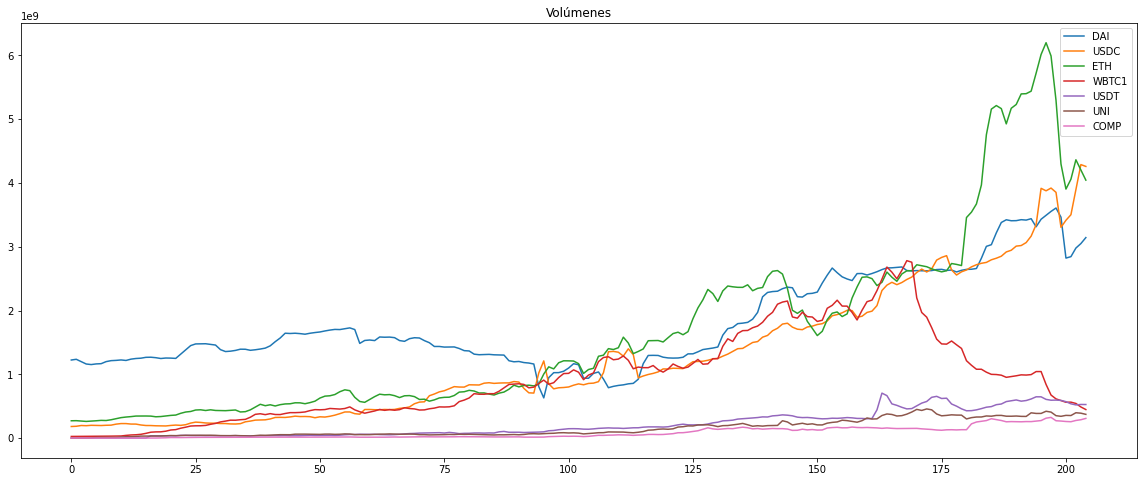

In [5]:
# Cálculo de los volúmenes
 
# Total suplido en cada mercado (cTK)
TSDAI = list(TSupdai); TSUSDC = list(TSupusdc); TSETH = list(TSupeth); TSWBTC1 = list(TSupwbtc1)
TSUSDT = list(TSupusdt); TSUNI = list(TSupuni); TSCOMP = list(TSupcomp); 

# ExchangeRates
ERDAI = list(Xratedai); ERUSDC = list(Xrateusdc); ERETH = list(Xrateeth); ERWBTC1 = list(Xratewbtc1)
ERUSDT = list(Xrateusdt); ERUNI = list(Xrateuni); ERCOMP = list(Xratecomp); 

# Precios (USD)
PRDAI = list(PUSDdai); PRUSDC = list(PUSDusdc); PRETH = list(PUSDeth); PRWBTC1 = list(PUSDwbtc1)
PRUSDT = list(PUSDusdt); PRUNI = list(PUSDuni); PRCOMP = list(PUSDcomp); 

# Cantidad de datos
# lenData = min(len(TSDAI),len(TSUSDC),len(TSETH),len(TSUSDT))
lenData = min(len(TSDAI),len(TSUSDC),len(TSETH),len(TSWBTC1),len(TSUSDT),len(TSUNI),len(TSCOMP))

TSDAI = TSDAI[len(TSDAI)-lenData:]; TSUSDC = TSUSDC[len(TSUSDC)-lenData:]; TSETH = TSETH[len(TSETH)-lenData:]
TSWBTC1 = TSWBTC1[len(TSWBTC1)-lenData:]; TSUSDT = TSUSDT[len(TSUSDT)-lenData:]; TSUNI = TSUNI[len(TSUNI)-lenData:]
TSCOMP = TSCOMP[len(TSCOMP)-lenData:]

ERDAI = ERDAI[len(ERDAI)-lenData:]; ERUSDC = ERUSDC[len(TSUSDC)-lenData:]; ERETH = ERETH[len(ERETH)-lenData:]
ERWBTC1 = ERWBTC1[len(ERWBTC1)-lenData:]; ERUSDT = ERUSDT[len(TSUSDT)-lenData:]; ERUNI = ERUNI[len(ERUNI)-lenData:]
ERCOMP = ERCOMP[len(ERCOMP)-lenData:]

PRDAI = PRDAI[len(PRDAI)-lenData:]; PRUSDC = PRUSDC[len(PRUSDC)-lenData:]; PRETH = PRETH[len(PRETH)-lenData:]
PRWBTC1 = PRWBTC1[len(PRWBTC1)-lenData:]; PRUSDT = PRUSDT[len(PRUSDT)-lenData:]; PRUNI = PRUNI[len(PRUNI)-lenData:]
PRCOMP = PRCOMP[len(PRCOMP)-lenData:]

# Volúmenes
volDAI = []; volUSDC = []; volETH = []; volWBTC1 = []; volUSDT = []; volUNI = []; volCOMP = []

for v in range(lenData):
    NVDAI = TSDAI[v]*ERDAI[v]*PRDAI[v]
    NVUSDC = TSUSDC[v]*ERUSDC[v]*PRUSDC[v]
    NVETH = TSETH[v]*ERETH[v]*PRETH[v]
    NVWBTC1 = TSWBTC1[v]*ERWBTC1[v]*PRWBTC1[v]
    NVUSDT = TSUSDT[v]*ERUSDT[v]*PRUSDT[v]
    NVUNI = TSUNI[v]*ERUNI[v]*PRUNI[v]
    NVCOMP = TSCOMP[v]*ERCOMP[v]*PRCOMP[v]
    volDAI.append(NVDAI); volUSDC.append(NVUSDC); volETH.append(NVETH); volWBTC1.append(NVWBTC1); volUSDT.append(NVUSDT)  
    volUNI.append(NVUNI); volCOMP.append(NVCOMP)
    
figsize(20,8)
plt.plot(volDAI,label="DAI")
plt.plot(volUSDC,label="USDC")
plt.plot(volETH,label="ETH")
plt.plot(volWBTC1,label="WBTC1")
plt.plot(volUSDT,label="USDT")
plt.plot(volUNI,label="UNI")
plt.plot(volCOMP,label="COMP")
plt.title("Volúmenes")
plt.legend()
plt.show()

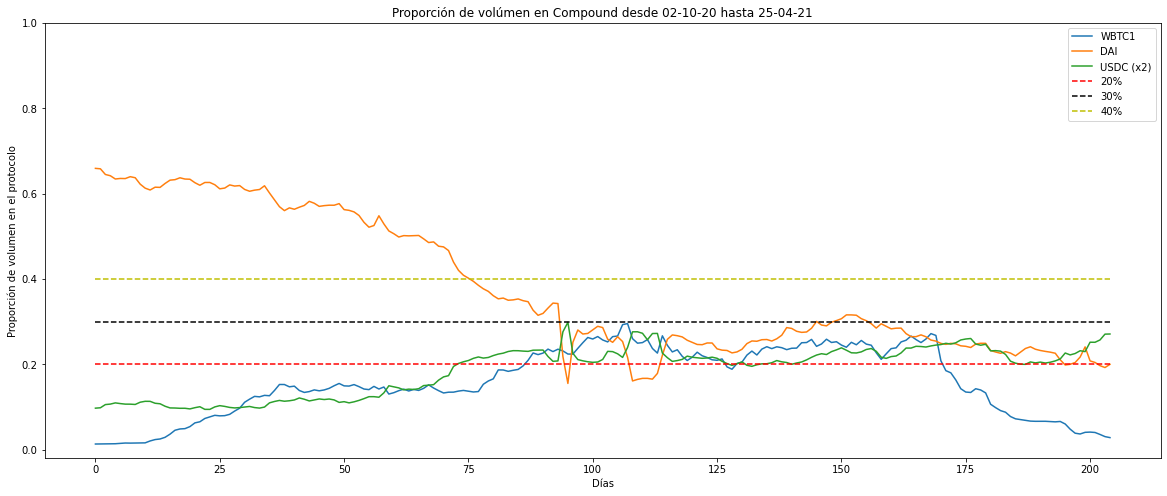

In [39]:
volComp = []
for v in range(lenData):
    volComp.append(volDAI[v]+volUSDC[v]+volETH[v]+volUSDC[v])
#     volComp.append(volDAI[v]+volUSDC[v]+volWBTC1[v]+volUSDC[v])
#     volComp.append(volDAI[v]+volUSDC[v]+volETH[v]+volWBTC1[v]+volUSDT[v]+volUNI[v]+volCOMP[v])
    
perDAI = []; perUSDC = []; perETH = []; perWBTC1 = []; perUSDT = []; perUNI = []; perCOMP = []
lim20 = []; lim30 = []; lim40 = []
for v in range(lenData):
    perDAI.append(volDAI[v]/volComp[v])
    perUSDC.append(volUSDC[v]/volComp[v])
    perETH.append(volETH[v]/volComp[v])
    perWBTC1.append(volWBTC1[v]/volComp[v])
    perUSDT.append(volUSDT[v]/volComp[v])
    perUNI.append(volUNI[v]/volComp[v])
    perCOMP.append(volCOMP[v]/volComp[v])
    lim20.append(0.2);lim30.append(0.3);lim40.append(0.4)
    
figsize(20,8)
# plt.plot(perETH,label="ETH")
plt.plot(perWBTC1,label="WBTC1")
plt.plot(perDAI,label="DAI")
plt.plot(perUSDC,label="USDC (x2)")
plt.plot(lim20,"r--", label = "20%"); plt.plot(lim30,"k--", label = "30%"); plt.plot(lim40,"y--", label = "40%")
# plt.plot(perUNI,label="UNI")
# plt.plot(perCOMP,label="COMP")
# plt.plot(perUSDT,label="USDT")
plt.title("Proporción de volúmen en Compound desde 02-10-20 hasta 25-04-21")
plt.xlabel("Días"); plt.ylabel("Proporción de volumen en el protocolo")
plt.ylim(top=1)
plt.legend()
plt.show()

In [40]:
ethBalance = []
for value in range(len(TSETH)):
    ethBalance.append(TSETH[value]*ERETH[value])
    
wbtc1Balance = []
for value in range(len(TSWBTC1)):
    wbtc1Balance.append(TSWBTC1[value]*ERWBTC1[value])

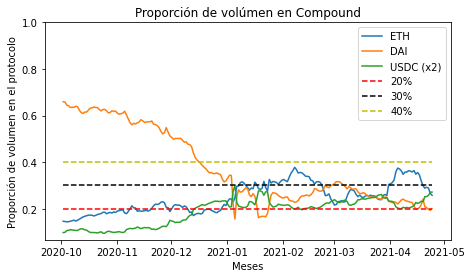

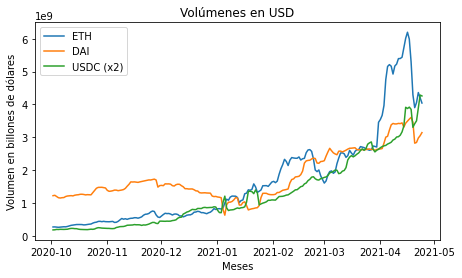

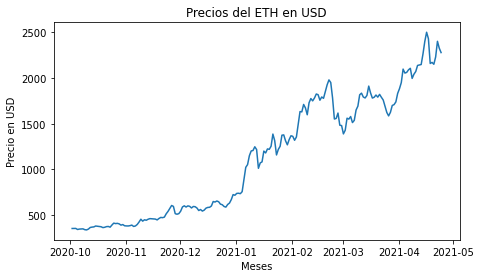

In [42]:
figsize(16,4)
fechas = BorRdai.keys()
plt.subplot(1,2,1)
plt.plot(fechas[len(fechas)-lenData:],perETH,label="ETH")
# plt.plot(fechas[len(fechas)-lenData:],perWBTC1,label="WBTC1")
plt.plot(fechas[len(fechas)-lenData:],perDAI,label="DAI")
plt.plot(fechas[len(fechas)-lenData:],perUSDC,label="USDC (x2)")
# plt.plot(fechas[len(fechas)-lenData:],perUSDT,label="USDT")
# plt.plot(fechas[len(fechas)-lenData:],perUNI,label="UNI")
# plt.plot(fechas[len(fechas)-lenData:],perCOMP,label="COMP")
plt.plot(fechas[len(fechas)-lenData:],lim20,"r--", label = "20%")
plt.plot(fechas[len(fechas)-lenData:],lim30,"k--", label = "30%")
plt.plot(fechas[len(fechas)-lenData:],lim40,"y--", label = "40%")
plt.title("Proporción de volúmen en Compound")
plt.xlabel("Meses"); plt.ylabel("Proporción de volumen en el protocolo")
plt.ylim(top=1)
plt.legend()
plt.show()

plt.subplot(1,2,1)
# plt.plot(fechas[len(fechas)-lenData:],volWBTC1,label="WBTC1")
plt.plot(fechas[len(fechas)-lenData:],volETH,label="ETH")
plt.plot(fechas[len(fechas)-lenData:],volDAI,label="DAI")
plt.plot(fechas[len(fechas)-lenData:],volUSDC,label="USDC (x2)")
# plt.plot(fechas[len(fechas)-lenData:],volUSDT,label="USDT")
# plt.plot(fechas[len(fechas)-lenData:],volUNI,label="UNI")
# plt.plot(fechas[len(fechas)-lenData:],volCOMP,label="COMP")
plt.title("Volúmenes en USD")
plt.xlabel("Meses"); plt.ylabel("Volumen en billones de dólares")
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(fechas[len(fechas)-lenData:],PRETH)
plt.title("Precios del ETH en USD")
plt.xlabel("Meses"); plt.ylabel("Precio en USD")
plt.show()

# plt.subplot(1,2,1)
# plt.plot(fechas[len(fechas)-lenData:],PRWBTC1)
# plt.title("Precios del WBTC en USD")
# plt.xlabel("Meses"); plt.ylabel("Precio en USD")
# plt.show()

# plt.plot(fechas[len(fechas)-lenData:],PRETH)
# plt.title("Precios del ETH en USD")
# plt.xlabel("Meses"); plt.ylabel("Precio en USD")

# plt.subplot(1,3,3)
# plt.plot(fechas[len(fechas)-lenData:],ethBalance)
# plt.title("TotalSupply en ETH")
# plt.xlabel("Meses"); plt.ylabel("Volumen en ETH")
plt.show()

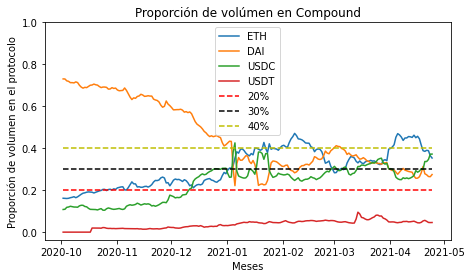

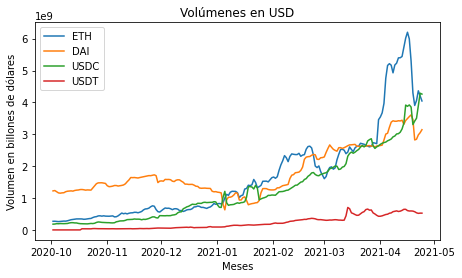

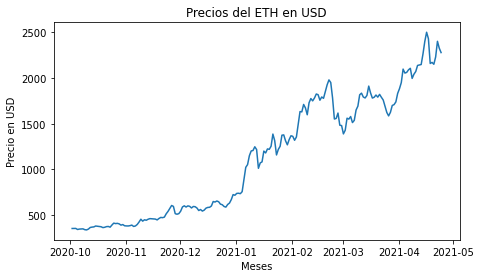

In [27]:
figsize(16,4)
fechas = BorRdai.keys()
plt.subplot(1,2,1)
plt.plot(fechas[len(fechas)-lenData:],perETH,label="ETH")
plt.plot(fechas[len(fechas)-lenData:],perDAI,label="DAI")
plt.plot(fechas[len(fechas)-lenData:],perUSDC,label="USDC")
plt.plot(fechas[len(fechas)-lenData:],perUSDT,label="USDT")
# plt.plot(fechas[len(fechas)-lenData:],perWBTC1,label="WBTC1")
# plt.plot(fechas[len(fechas)-lenData:],perUNI,label="UNI")
# plt.plot(fechas[len(fechas)-lenData:],perCOMP,label="COMP")
plt.plot(fechas[len(fechas)-lenData:],lim20,"r--", label = "20%")
plt.plot(fechas[len(fechas)-lenData:],lim30,"k--", label = "30%")
plt.plot(fechas[len(fechas)-lenData:],lim40,"y--", label = "40%")

plt.title("Proporción de volúmen en Compound")
plt.xlabel("Meses"); plt.ylabel("Proporción de volumen en el protocolo")
plt.ylim(top=1)
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(fechas[len(fechas)-lenData:],volETH,label="ETH")
plt.plot(fechas[len(fechas)-lenData:],volDAI,label="DAI")
plt.plot(fechas[len(fechas)-lenData:],volUSDC,label="USDC")
# plt.plot(fechas[len(fechas)-lenData:],volWBTC1,label="WBTC1")
plt.plot(fechas[len(fechas)-lenData:],volUSDT,label="USDT")
# plt.plot(fechas[len(fechas)-lenData:],volUNI,label="UNI")
# plt.plot(fechas[len(fechas)-lenData:],volCOMP,label="COMP")
plt.title("Volúmenes en USD")
plt.xlabel("Meses"); plt.ylabel("Volumen en billones de dólares")
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(fechas[len(fechas)-lenData:],PRETH)
plt.title("Precios del ETH en USD")
plt.xlabel("Meses"); plt.ylabel("Precio en USD")
plt.show()




# plt.plot(fechas[len(fechas)-lenData:],PRETH)
# plt.title("Precios del ETH en USD")
# plt.xlabel("Meses"); plt.ylabel("Precio en USD")

# plt.subplot(1,3,3)
# plt.plot(fechas[len(fechas)-lenData:],ethBalance)
# plt.title("TotalSupply en ETH")
# plt.xlabel("Meses"); plt.ylabel("Volumen en ETH")
plt.show()